# **Budget Optimizer**

**Project Description:**

The project is about understanding how people make decisions when they have a limited budget and need to buy two different things. We'll use a simple example to show how someone might decide how much of each thing to buy to get the most satisfaction (or utility) from their money. We'll draw two graphs: one that shows how much satisfaction they get from buying different amounts of each thing (called the utility function), and another that shows the various combinations of things they can buy with their budget (called the budget constraint). By looking at where these two graphs intersect, we can determine the best combination of things to buy that gives them the most satisfaction within their budget.

**Idea Statement:**

The project utilizes principles from microeconomics and mathematical optimization to determine the optimal allocation of resources for a rational consumer facing budget constraints. It employs Python programming to graphically represent the utility function, budget constraint, and tangency point, providing insights into consumer behavior and decision-making.

**No dataset used**

**Algorithm: Decision Tree**: A hierarchical structure guides user interactions, enabling dynamic adjustments to inputs and visualization of results.


**Data Structures:** Dictionary & Lists



### **Code Description:**

- **Graph Class**:
    - **Responsibility**: Plotting budget lines, tangency points, and utility contours.
    - **Dependencies**: Matplotlib and NumPy.
- **BudgetFinder Class**:
    - **Responsibility**: Determines optimal quantities of goods based on utility functions and budget constraints.
    - **Dependencies**: SymPy for symbolic math operations.
- **DecisionNode Class**:
    - **Responsibility**: Forms the decision tree structure for user interaction.

In [ ]:
#importing necessary files
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

## **Libraries Used**

**1. Matplotlib:**

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is widely used for generating plots, histograms, power spectra, bar charts, error charts, and scatterplots.

*What is it used for in this project?*
For graphing various economic concepts, such as budget lines, utility functions, tangency points, and utility contours.

**2. SymPy:**

SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy provides functions for symbolic computation, including algebraic manipulation, calculus, equation solving, and more.

*What is it used for in this project?*
For symbolic math operations, particularly in solving optimization problems related to utility maximization subject to budget constraints. It helps find the optimal quantities of goods by performing symbolic calculations.

**3. NumPy:**

NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

*What is it used for in this project?*
For numerical operations required for graphing and optimization. It helps in creating arrays to represent different variables, performing mathematical operations on these arrays, and facilitating data manipulation tasks.

### **Graph Class**

**Purpose:** Represents a graph for visualizing utility functions, budget lines, and tangency points

**Functions:**

- *init:* Initializes the Graph object with data points for x and y axes, budget line points, and utility function.

- *draw functions:* Draws the utility function, budget line, and tangency point on the graph using Matplotlib.

- *plot tangency point:* Plots the tangency point on the graph.

In [ ]:
class Graph():

    """graphs the functions"""
    def __init__(self, x, y, budget_line_points, utility):
        self.x = x
        self.y = y
        self.budget_line_points = budget_line_points
        self.utility = utility

    def draw_functions(self):
        """draws the functions on the graph"""
        # Plot budget line
        plt.plot([point[0] for point in self.budget_line_points],
                [point[1] for point in self.budget_line_points],
                label="Budget Line", color='blue')

        # Plot tangency point
        plt.plot(self.x, self.y, 'ro', label="Tangency Point")

        # Evaluate utility function for a range of x1 and x2 values
        x1_values = np.linspace(0, 10, 100)
        x2_values = np.linspace(0, 10, 100)

        # Calculate utility values for each combination of x1 and x2
        utility_values = np.outer(x2_values, x1_values)  # Outer product of x2 and x1

        # Plot utility function using a contour plot
        plt.contour(x1_values, x2_values, utility_values, levels=20, cmap='RdGy', alpha=0.5)

        # Label axes
        plt.xlabel("Quantity of Good 1")
        plt.ylabel("Quantity of Good 2")

        # Add legend
        plt.legend()

        # Show plot
        plt.show()

    def plot_tangency_point(self):
        """plots the tangency point"""
        plt.plot(self.x, self.y)


### **Budget Finder Class**

**Purpose:** Finds the optimal allocation of goods within the budget constraint and manages utility functions.

**Functions:**

- *init:* Initializes the BudgetFinder object with default or user-defined parameters.

- *find optimal mrs:* Finds the optimal Marginal Rate of Substitution (MRS) by solving equations for the tangency point.

- *budget line points:* Determines the points along the budget line based on prices and total budget.

- *modify price one:* Modifies the price of the first good and updates the budget line points accordingly.

- *modify price two:* Modifies the price of the second good and updates the budget line points accordingly.

- *modify total:* Modifies the total budget and updates the budget line points accordingly.

- *modify utility:* Modifies the utility function and updates the budget line points accordingly.

- *graph it:* Creates a graph with the utility function, budget line, and tangency point using the Graph class.



In [ ]:
class BudgetFinder():
    """finds the optimal amount of each good, and the function of the budget"""
    def __init__(self, utility=0, price_one=0, price_two=0, total_money=0):
        self.utility = utility
        self.price_one = price_one
        self.price_two = price_two
        self.total_money = total_money
        self.budget_points = 0
        self.utility_quantities = {}



    def find_optimal_mrs(self):
        """finds the optimal MRS function"""
        # Define symbols
        x1 = sp.Symbol('x1')
        x2 = sp.Symbol('x2')

        # Calculate the MRS (Marginal Rate of Substitution)
        mrs = sp.diff(self.utility, x1) / sp.diff(self.utility, x2)
        # Set up equation: MRS = price_one / price_two
        equation = sp.Eq(mrs, self.price_one/self.price_two)

        budget_equation = sp.Eq(x2, self.total_money/self.price_two - \
                                self.price_one/self.price_two*x1)
        # Solve the equation
        sol = sp.solve([equation, budget_equation], (x1, x2))

        return sol

    def budget_line_points(self):
        "finds the points along the budget_line"
        slope = (self.price_one/self.price_two)*-1
        y_intercept = self.total_money/self.price_two
        good_one = range(0, int(self.total_money / self.price_one) + 1)

        budget_line_points = [(x1, slope * x1 + y_intercept) for x1 in good_one]

        return budget_line_points


    def modify_price_one(self, new_price):
        """modifies price one"""
        self.price_one = new_price
        if self.price_two != 0:
            self.budget_points = self.budget_line_points()


    def modify_price_two(self, new_price):
        """modifies price two"""
        self.price_two = new_price
        if self.price_one != 0:
            self.budget_points = self.budget_line_points()

    def modify_total(self, new_total):
        """modifies total"""
        self.total_money = new_total
        self.budget_points = self.budget_line_points()


    def modify_utility(self, new_utility):
        """Modifies utility function"""
        try:
            self.utility = sp.sympify(new_utility)
            self.budget_points = self.budget_line_points()
        except sp.SympifyError as e:
            print("Error: Invalid utility function:", e)


    def graph_it(self):
        """creates the graph with both functions and tangency point"""
        ans = self.find_optimal_mrs()
        x = ans[sp.Symbol('x1')]
        y = ans[sp.Symbol('x2')]

        graph = Graph(x, y, self.budget_points, self.utility)
        graph.draw_functions()
        graph.plot_tangency_point()


## **DecisionNode Class:**

**Purpose:** Represents a decision node in a decision tree for user interaction.
Functions:

**Functions:**

- *init:* Initializes the DecisionNode object with a label, list of choices, and associated action.

- *print label:* Prints the label of the decision node

- *print choices:* Prints the choices available for the decision node.

### **build_decision_tree():**

**Purpose:** Constructs a decision tree with decision nodes for modifying prices, utility function, total amount of money, showing graphs, and finding optimal solutions.


### **interact_with_user():**

**Purpose:**  Interacts with the user by presenting choices and performing actions based on user input, using the provided decision tree and budget object.

In [ ]:
class DecisionNode:
    """creates the node"""
    def __init__(self, label, choices=None, action=None):
        self.label = label  # Label or description of the decision
        self.choices = choices or []  # List of possible choices (child nodes)
        self.action = action  # Action associated with the decision (e.g., modify price, utility
        #function)
    def print_label(self):
        """print label"""
        print (self.label)

    def print_choices(self):
        """print choices"""
        print (self.choices)

def build_decision_tree():
    """builds a decision tree"""
    # Define decision nodes
    root = DecisionNode("Root")
    price_one_node = DecisionNode("Change price of good one", action = "modify_price_one")
    price_two_node = DecisionNode("Change price of good two", action = "modify_price_two")
    utility_node = DecisionNode("Change utility function", action = "modify_utility")
    total_node = DecisionNode("Change total amount of money", action = "modify_total")
    show_node = DecisionNode("Show graph", action = "graph_it")
    optimal_node = DecisionNode("Find optimal solution", action = "find_optimal_mrs")

    # Connect nodes to form tree structure
    root.choices = [price_one_node, price_two_node, utility_node, total_node, show_node,
                        optimal_node]

    return root

def interact_with_user(decision_tree, user_budget):
    """Interacts with the user"""
    current_node = decision_tree
    while True:
        print("Current Decision:", current_node.label)
        print("Available Choices:")
        for idx, choice in enumerate(current_node.choices, start=1):
            print(f"{idx}. {choice.label}")

        choice_idx = input(f"Enter your choice (1-{len(current_node.choices)}) or 'q' to quit: ")
        if choice_idx.lower() == 'q':
            break
        if choice_idx.isdigit():
            choice_idx = int(choice_idx)
            if 1 <= choice_idx <= len(current_node.choices):
                chosen_node = current_node.choices[choice_idx - 1]
                if chosen_node.action == "modify_utility":
                    new_info = input("Input what you would like to change utility to: ")
                    # Perform action associated with the chosen node
                    getattr(user_budget, chosen_node.action)(new_info)
                elif chosen_node.action == "find_optimal_mrs":
                    print(user_budget.find_optimal_mrs())
                elif chosen_node.action == "graph_it":
                    user_budget.graph_it()
                elif chosen_node.action:
                    new_info = input("Input what you would like to change it to: ")
                    # Perform action associated with the chosen node
                    getattr(user_budget, chosen_node.action)(float(new_info))
                current_node = chosen_node
            else:
                print("Invalid choice. Please try again.")
        else:
            print("Invalid input. Please enter a number or 'q' to quit.")
        current_node = decision_tree



### **starter():**

**Purpose:** Initializes the BudgetFinder object with user-defined parameters for prices, total budget, and utility function.

- **Steps**:
    1. **Input Prices**: Prompts the user to input the prices of goods one and two.
    2. **Input Total Budget**: Prompts the user to input the total budget available.
    3. **Input Utility Function**: Prompts the user to input the utility function parameters.
    4. **Create BudgetFinder Object**: Initializes a BudgetFinder object with the inputted parameters.
    5. **Return BudgetFinder Object**: Returns the initialized BudgetFinder object for further interaction.

The **`starter()`** function serves as the entry point for initializing the BudgetFinder object with user-provided inputs, setting the stage for subsequent interactions and optimizations within the interactive tool.

In [ ]:
def starter():
    """always requires that they input everything first"""
    user_budget = BudgetFinder()

    price = float(input("How much is good one priced at?: "))
    user_budget.modify_price_one(price)
    price = float(input("How much is good two priced at?: "))
    user_budget.modify_price_two(price)
    total = float(input("What is the total amount of money available?: "))
    user_budget.modify_total(total)
    utility = input("What is the utility function?: ") #maybe we can add example functions possible bc its so specific
    user_budget.modify_utility(utility)

    return user_budget

### **main():**

**Purpose:**

Initializes the decision tree and budget object, then starts the interaction with the user.

How much is good one priced at?: 1
How much is good two priced at?: 1
What is the total amount of money available?: 12
What is the utility function?: x1*x2
Current Decision: Root
Available Choices:
1. Change price of good one
2. Change price of good two
3. Change utility function
4. Change total amount of money
5. Show graph
6. Find optimal solution
Enter your choice (1-6) or 'q' to quit: 5


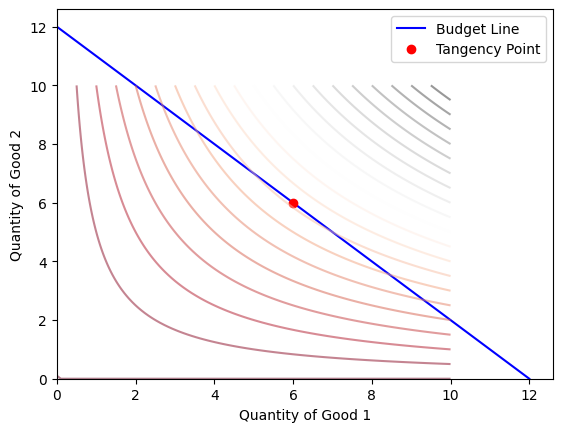

Current Decision: Root
Available Choices:
1. Change price of good one
2. Change price of good two
3. Change utility function
4. Change total amount of money
5. Show graph
6. Find optimal solution
Enter your choice (1-6) or 'q' to quit: q


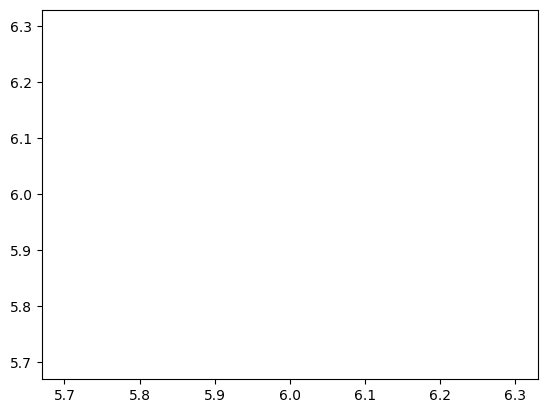

In [ ]:
def main():
    """main"""
    # Initialize decision tree

    decision_tree = build_decision_tree()

    # Initialize BudgetFinder
    user_budget = starter()

    # Start interaction with user
    interact_with_user(decision_tree, user_budget)

if __name__ == "__main__":
    main()

## **Inputs & Outputs:**

**Inputs**

1. *Price of Good One (price_one)*: The price of the first good, inputted by the user.
2. *Price of Good Two (price_two)*: The price of the second good, inputted by the user.
3. *Total Amount of Money (total_money)*: The total budget available to the consumer, inputted by the user.
4. *Utility Function (utility)*: The utility function representing the preferences of the consumer, inputted by the user.

**Outputs**

1. *Optimal Quantities of Goods (x1, x2)*: The optimal quantities of goods one and two that maximize utility subject to the budget constraint.
2. *Graphical Representation*:

    - **Budget Line**: Visual representation of the budget constraint.

    - **Tangency Point**: Graphical depiction of the optimal consumption bundle where the budget line is tangent to the utility function.

    - **Utility Contours**: Contour plot representing different levels of utility.


